In [18]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
from lightgbm import LGBMClassifier

# To measure time
from time import time

In [13]:
train_df = pd.read_csv("k:/sensor_report/kaggle/train.csv/train.csv", encoding='utf-8')
test_df = pd.read_csv("k:/sensor_report/kaggle/test.csv/test.csv")

In [14]:
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
train_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train


In [62]:
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True) # 세로로 합치고 재인덱싱
both_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train


In [15]:
both_df['subject'] = '#' + both_df['subject'].astype(str)
both_df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train


In [63]:
label = both_df.pop('Activity')
label

0                  STANDING
1                  STANDING
2                  STANDING
3                  STANDING
4                  STANDING
5                  STANDING
6                  STANDING
7                  STANDING
8                  STANDING
9                  STANDING
10                 STANDING
11                 STANDING
12                 STANDING
13                 STANDING
14                 STANDING
15                 STANDING
16                 STANDING
17                 STANDING
18                 STANDING
19                 STANDING
20                 STANDING
21                 STANDING
22                 STANDING
23                 STANDING
24                 STANDING
25                 STANDING
26                 STANDING
27                  SITTING
28                  SITTING
29                  SITTING
                ...        
10269      WALKING_UPSTAIRS
10270      WALKING_UPSTAIRS
10271      WALKING_UPSTAIRS
10272      WALKING_UPSTAIRS
10273      WALKING_U

In [19]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [64]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data') # 아까만든 데이터 칼럼 추출 훈련셋과 테스트셋 구분용? 
# 난 필요없음.
subject_data = tsne_data.pop('subject') # 사람별 데이터 추출


In [23]:
# Scale data
scl = StandardScaler() # 정규화로 데이터를 스케일조정
tsne_data = scl.fit_transform(tsne_data)


In [27]:
# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

In [28]:
# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


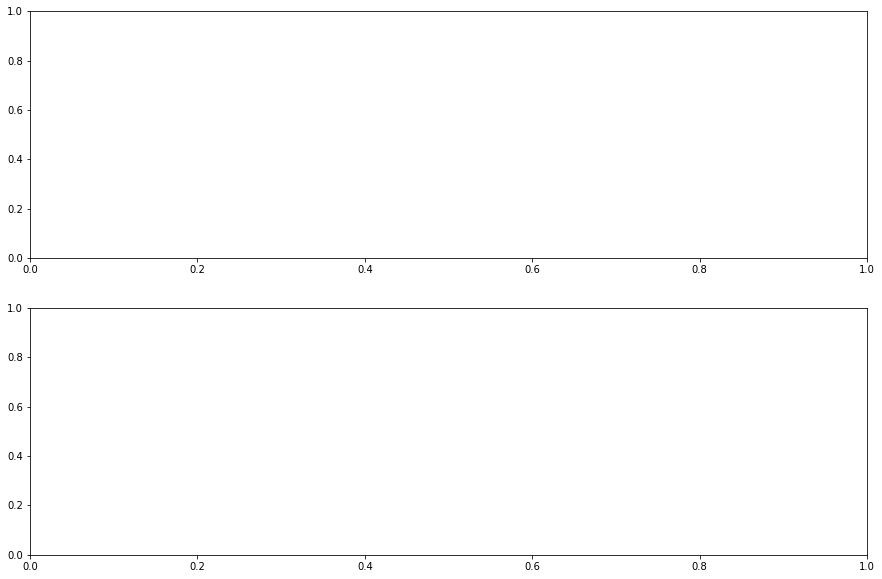

In [31]:
### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

In [55]:
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    print(mask)

[False False False ... False False False]
[ True  True  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True  True  True]
[False False False ... False False False]


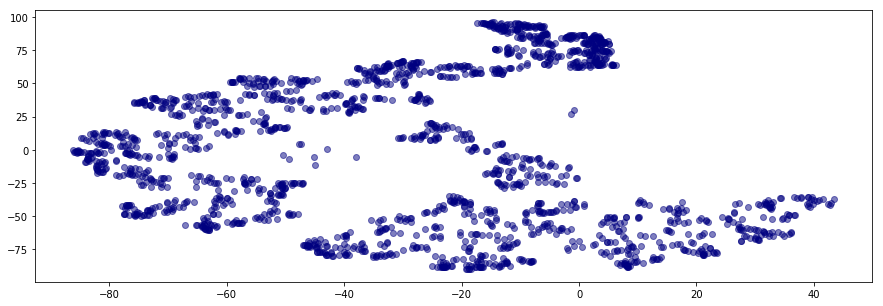

In [53]:
plt.figure(figsize=(15,5))
plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

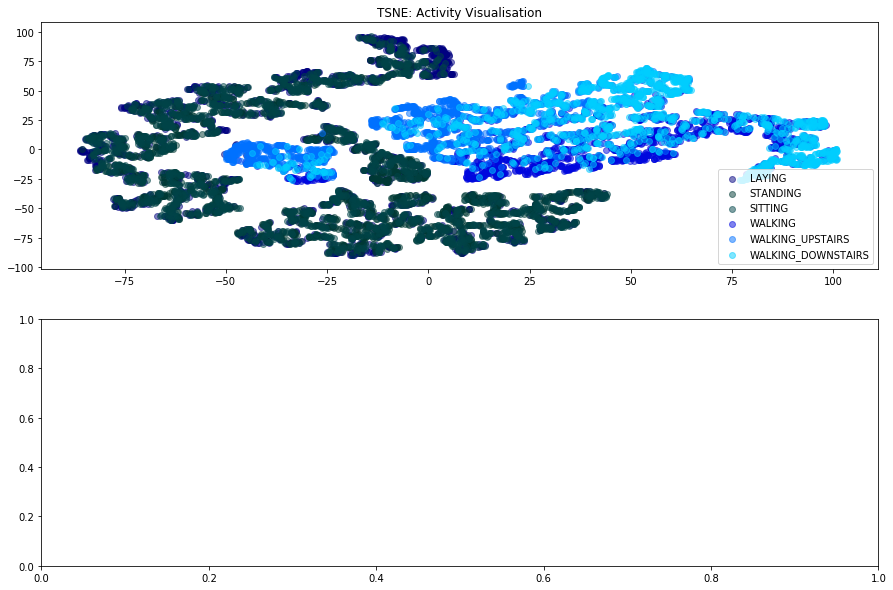

In [56]:
# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))
# Plot each activity
label_counts = label.value_counts() # for 에서 인덱스로 잡음. 우리 모델에서는 label 값
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()
plt.show()

In [72]:
for i, group in enumerate(label_counts.index):
    print(i)
    print(group)

0
LAYING
1
STANDING
2
SITTING
3
WALKING
4
WALKING_UPSTAIRS
5
WALKING_DOWNSTAIRS


In [77]:
mask = (label=='STANDING').values
mask

array([ True,  True,  True, ..., False, False, False])

In [86]:
np.info(tsne_transformed[mask][:,0]) # 트랜스폼된 standing 데이터

class:  ndarray
shape:  (1906,)
strides:  (8,)
itemsize:  4
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x190aab062d0
byteorder:  little
byteswap:  False
type: float32


In [ ]:
axarr[1].scatter(x=tsne_transformed[mask][:,0], 
                 y=tsne_transformed[mask][:,1], c=colors[i],
                 alpha=0.5, label=group)

In [59]:
### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

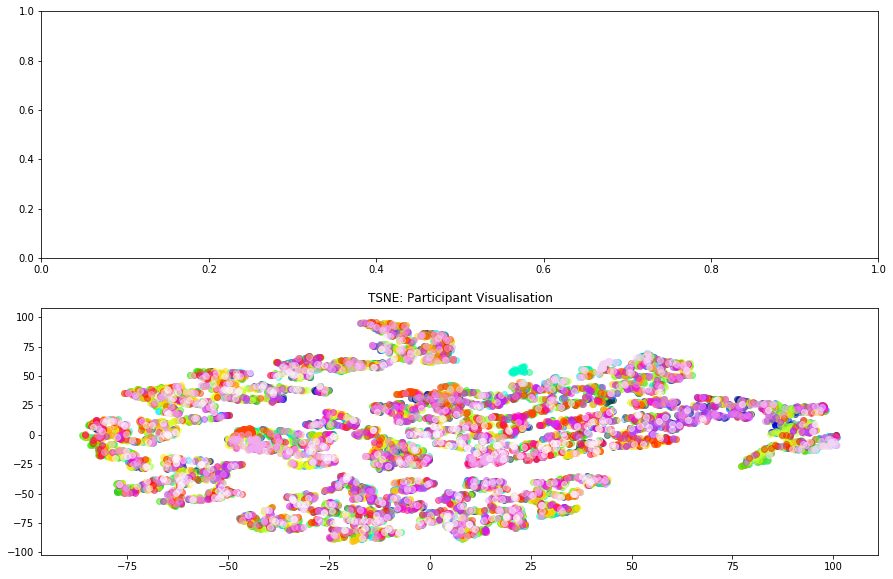

In [60]:
fig, axarr = plt.subplots(2, 1, figsize=(15,10))
# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

No handles with labels found to put in legend.


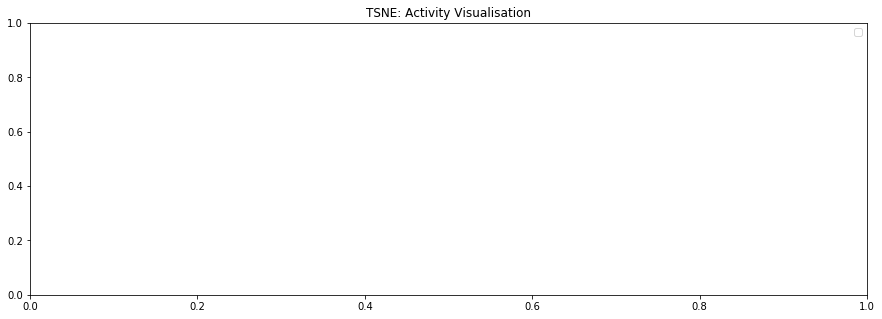

In [67]:
plt.figure(figsize=(15,5))
plt.title('TSNE: Activity Visualisation')
plt.legend()
plt.show()